In [1]:
import cv2 as cv  ## opencv-python==3.4.8.29
import cv2
import numpy as np
from  matplotlib import pyplot as plt

In [2]:
# slam 视频
cap = cv2.VideoCapture("./images/1.mp4")
frame_num = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
h_ = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
w_ = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
gray_video = np.zeros((frame_num, h_, w_),dtype=np.uint8)
int(cap.get(7))
count = 0
for i in range(frame_num):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_video[count] = gray
    count += 1

最小距离：5.000000
最大距离：85.000000
匹配数：190


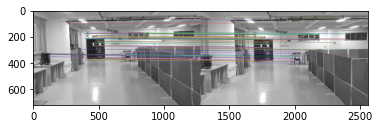

In [3]:
# 读取图片
im1 = gray_video[0]
im2 = gray_video[50]
# ORB特征提取
orb = cv.ORB_create()
kp1 = orb.detect(im1)
kp2 = orb.detect(im2)
kp1, des1 = orb.compute(im1, kp1)  # 求特征
kp2, des2 = orb.compute(im2, kp2)  # 求特征
bf = cv.BFMatcher(cv.NORM_HAMMING)  # 初始化Matcher
matches = bf.match(des1, des2)    # 配准
# 进行初步筛选
min_distance = 10000
max_distance = 0
for x in matches:
    if x.distance < min_distance:
        min_distance = x.distance
    if x.distance > max_distance:
        max_distance = x.distance
print('最小距离：%f' % min_distance)
print('最大距离：%f' % max_distance)
good_match = []
for x in matches:
    if x.distance <= max(2 * min_distance, 30):
        good_match.append(x)
print('匹配数：%d' % len(good_match))
outimage = cv.drawMatches(im1, kp1, im2, kp2, good_match, outImg=None)
plt.imshow(outimage[:, :, ::-1])
plt.show()


In [5]:
# 相机参数
K = np.array([[ 1.20981082e+03, -6.38606499e-01,  6.27897309e+02],
       [ 0.00000000e+00,  1.18458039e+03,  3.30943028e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [9]:
# 提取配准点
points1 = []
points2 = []
for i in good_match:
    points1.append(list(kp1[i.queryIdx].pt))
    points2.append(list(kp2[i.trainIdx].pt))
points1 = np.array(points1)
points2 = np.array(points2)
# em,mask = cv.findEssentialMat(points1, points2, K, cv.RANSAC, 0.999, 1.0,np.array([])) #opencv4
# em,mask = cv.findEssentialMat(points1, points2, 521, (325.1,249.7), cv.RANSAC, 0.999, 1.0,np.array([])) #opencv3
em, mask = cv.findEssentialMat(points1, points2, K)       # 计算本质矩阵  RANSAC
print(em)
# print(mask)
# 求解位姿
#num,R,t,mask = cv.recoverPose( em, points1, points2, K)
num, R, t, mask = cv.recoverPose(em, points1, points2, np.array(
    []), np.array([]), 521, (325.1, 249.7), mask)
print(R)
print(t)


[[-0.0071543  -0.69954612 -0.04170128]
 [ 0.6999107  -0.00829021  0.09452334]
 [ 0.03252412 -0.09438051 -0.00108035]]


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\undistort.dispatch.cpp:591: error: (-215:Assertion failed) npoints >= 0 && src.isContinuous() && (depth == CV_32F || depth == CV_64F) in function 'cv::undistortPoints'


: 